# **Phase 4.** Model Assesment: validation of the model by Data Scientist before promotion to QA



#### __LIBRARY LOADING__

#### 4.1: Mlops framework library loading

In [28]:
from azureml.core import Workspace
from azureml.core.model import Model
from amlops.mlometadatamodel import MLOMetadataModel
from amlops.mlodata import MLOData
import gc

#### 4.2: Loading of libraries for evaluation and visualization of __model performance__

In [29]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as metrics
from sklearn.tree import plot_tree
import matplotlib as plt
from pylab import *
import operator
from sklearn import tree

### __DATA LOADING__

#### 4.3: Connection to the data source

In [30]:
# Conection to Azure workspace
workspace = Workspace.from_config()

#### 4.4: Load of the __models__ selected __for evaluation__

In [31]:
# Establish the name and version of the model to be recovered
model_name = 'admision-credito'
version = 1
# Carga del modelo
modeloAC = MLOMetadataModel.load_model_to_assesment(workspace, model_name, version)

No tag changes


/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/anaconda/envs/azureml_py38/lib/python3.8/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator AdaBoostClassifier from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(


#### 4.5: Visualization of the recovered model and its hyperparameters

In [32]:
modeloAC

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=5,
                                                         random_state=1),
                   learning_rate=0.5, random_state=1)

### __MODEL ASSESMENT__

#### 4.6: Data loading for model results assesment

In [33]:
df_train, df_validation, df_test = MLOData.load_df_with_evaluation(workspace, "daas-lab-frc-dataset-train-ai-001-admision-credito", "daas-lab-frc-dataset-test-ai-001-admision-credito", "daas-lab-frc-dataset-validation-ai-001-admision-credito", version = 1 )

In [34]:
print(f'Dimensiones de los datasets: Train: {df_train.shape}, Test: {df_test.shape} y Validation: {df_validation.shape}')

Dimensiones de los datasets: Train: (2534, 17), Test: (634, 17) y Validation: (634, 17)


#### 4.7: Separate the original dataset into three subsets, and separate the label or target from the model

The data sets for **train**, **test** and **validation** are loaded

In [35]:
df_train_labels =  df_train.loc[:, 'Ind_SCF_Funded']
df_train_set = df_train.drop(['Ind_SCF_Funded'],axis=1)
df_test_labels =  df_test.loc[:, 'Ind_SCF_Funded']
df_test_set = df_test.drop(['Ind_SCF_Funded'],axis=1)
df_validation_labels =  df_validation.loc[:, 'Ind_SCF_Funded']
df_validation_set = df_validation.drop(['Ind_SCF_Funded'],axis=1)

### __MODEL PREDICTIONS__

#### 4.8: Use of the model to make predictions with the validation set

In [36]:
# We obtain prediction
preds = modeloAC.predict(df_validation_set)
print(f'Some predictions {preds[0:10]} of the {len(preds)} with the validation dataset.')

Some predictions [0 0 1 0 0 0 1 1 0 0] of the 634 with the validation dataset.


### IMPORTANCE OF CHARACTERISTICS

#### 4.9: The importance of each variable in the dataset in the prediction of the model is sought

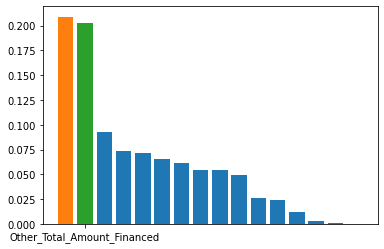

{'SCF_Monthly_Payment': 0.2089808292796344,
 'Other_Total_Amount_Financed': 0.20295228843125865,
 'SCF_Borrowing_Term': 0.09260835026485577,
 'SCF_Initial_Credit_Decision_Time_Min': 0.07305931392970014,
 'Other_Interest_Rate_Higher_New': 0.07146252917981762,
 'Other_Initial_Credit_Decision_Time_Min': 0.06578865130365961,
 'SCF_Total_Amount_Financed': 0.06169045365259814,
 'AVG_Other_Monthly_Payment': 0.054783531417921326,
 'SCF_Interest_Rate': 0.054400884554171434,
 'SCF_Down_Payment_New': 0.049151382135787285,
 'Other_Down_Payment_New': 0.025689346502716762,
 'Other__Borrowing_Term': 0.02393409099392638,
 'CCAA_New': 0.011813521408908524,
 'First_Submission_New': 0.002980280004949694,
 'Other_Promotion_Campaign_New': 0.0007045469400944968,
 'SCF_Promotion_Campaign_New': 0.0}

In [37]:
feature_importances = modeloAC.fit(df_train_set, df_train_labels).feature_importances_
dictionary_feature_importances = dict(zip(df_train_set.columns, feature_importances))
dictionary_feature_importances = dict(sorted(dictionary_feature_importances.items(), key=operator.itemgetter(1),reverse=True))
names = list(dictionary_feature_importances.keys())
values = list(dictionary_feature_importances.values())
plt.bar(range(len(dictionary_feature_importances)), list(dictionary_feature_importances.values()), align='center')
plt.bar(0,values[0],tick_label=names[0])
plt.bar(1,values[1],tick_label=names[1])
plt.show()
dictionary_feature_importances

### __MODEL INTERPRETATION__

#### 4.10: Parameters and characteristics of the final model

In [39]:
print(f'Number of classes to be predicted by the model: {modeloAC.n_classes_} \n\
Number of model features and their attributes: {modeloAC.n_features_in_} \n \
Base estimator used: {modeloAC.base_estimator_} \n\
Number of estimators in the set: {len(modeloAC.estimator_errors_)} with error values in the classification {modeloAC.estimator_errors_}')

Number of classes to be predicted by the model: 2 
Number of model features and their attributes: 16 
 Base estimator used: DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1) 
Number of estimators in the set: 50 with error values in the classification [0.05880032 0.13251917 0.1743899  0.18654159 0.26102279 0.29986823
 0.22577909 0.24442306 0.26267506 0.26512658 0.32646229 0.32700697
 0.40508468 0.40170476 0.36178594 0.38246067 0.35015119 0.30030553
 0.27465826 0.43369372 0.31283395 0.40549594 0.41617083 0.34465639
 0.4100954  0.44369789 0.43454468 0.44416035 0.38330562 0.32798541
 0.27433733 0.27275913 0.35238317 0.31517017 0.40421809 0.41658202
 0.38117336 0.36731938 0.4130198  0.33436804 0.27928257 0.32806269
 0.33864737 0.45547832 0.42486875 0.45208305 0.47498481 0.46509902
 0.43731514 0.48121188]


#### 4.11: Tree visualization

Tree depth: 5
Number of terminal nodes: 16


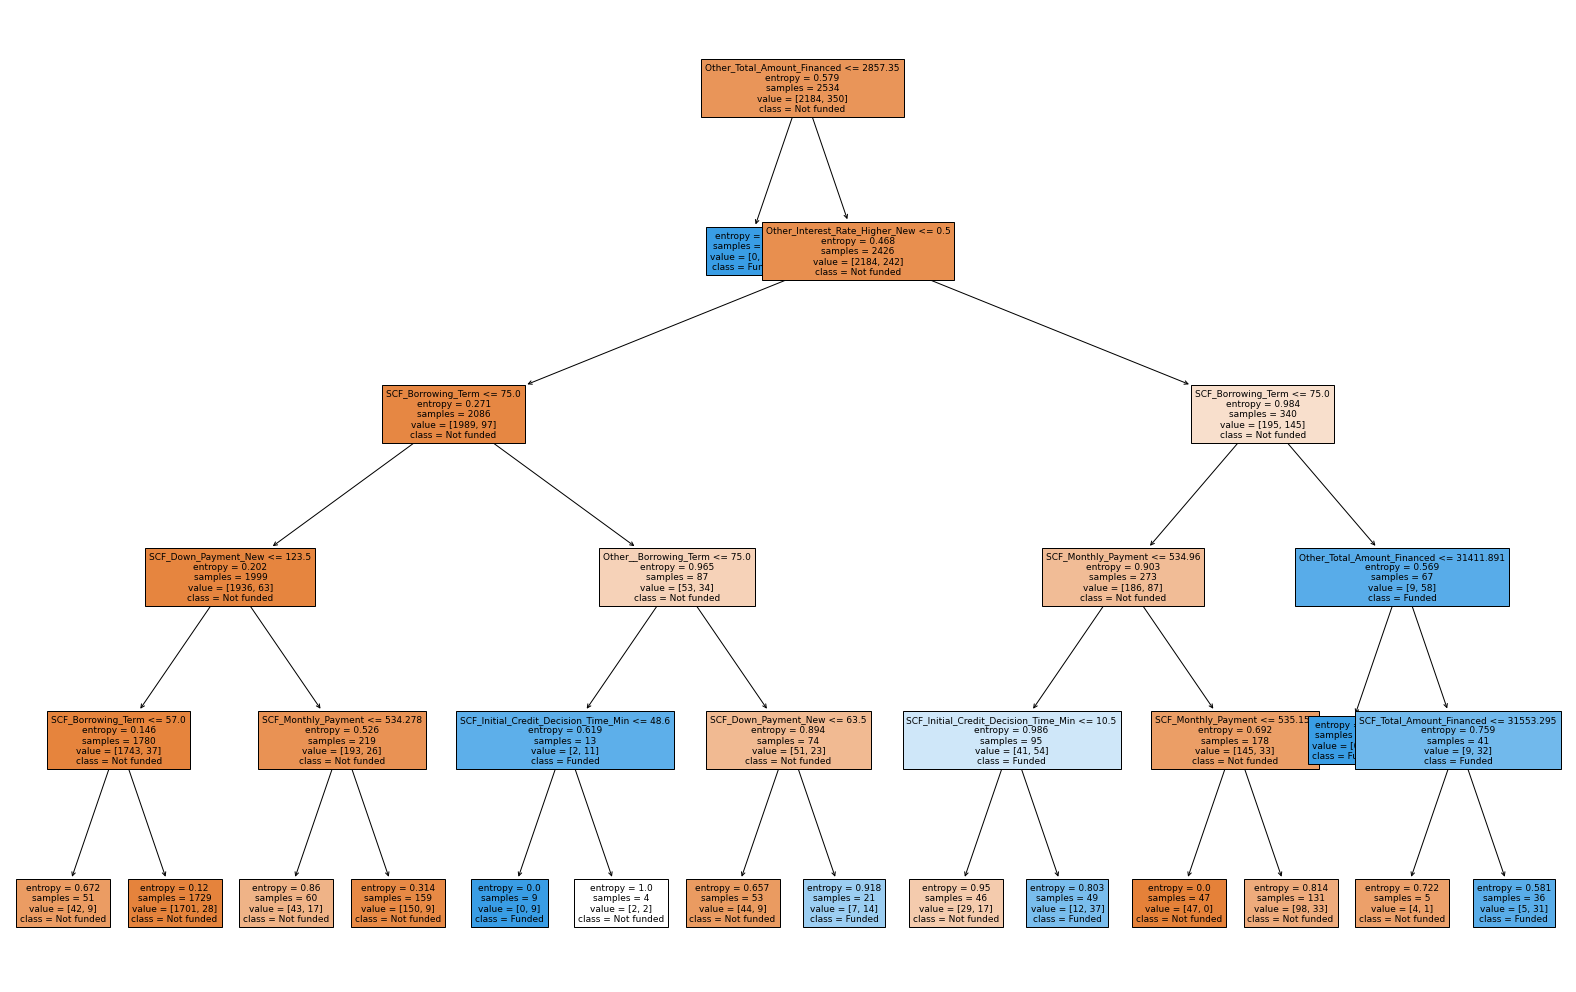

In [40]:
modeloAC.base_estimator.fit(df_train_set, df_train_labels)
fig, ax = plt.subplots(figsize=(28, 18))
print(f"Tree depth: {modeloAC.base_estimator_.get_depth()}")
print(f"Number of terminal nodes: {modeloAC.base_estimator_.get_n_leaves()}")
plot = plot_tree(
            decision_tree = modeloAC.base_estimator_,
            feature_names = df_train_set.columns.tolist(),
            filled        = True,
            impurity      = True,
            class_names= ['Not funded', 'Funded'],
            fontsize      = 9,
            ax            = ax
       )

In [41]:
text_tree = tree.export_text(modeloAC.base_estimator)
print(text_tree)

|--- feature_1 <= 2857.35
|   |--- class: 1
|--- feature_1 >  2857.35
|   |--- feature_11 <= 0.50
|   |   |--- feature_3 <= 75.00
|   |   |   |--- feature_12 <= 123.50
|   |   |   |   |--- feature_3 <= 57.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  57.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_12 >  123.50
|   |   |   |   |--- feature_5 <= 534.28
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  534.28
|   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  75.00
|   |   |   |--- feature_4 <= 75.00
|   |   |   |   |--- feature_6 <= 48.60
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  48.60
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_4 >  75.00
|   |   |   |   |--- feature_12 <= 63.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_12 >  63.50
|   |   |   |   |   |--- class: 1
|   |--- feature_11 >  0.50
|   |   |--- feature_3 <= 75.00
|   |   |   |--- feature_5 <= 534.

__Entropy__ is the amount of disorder or randomness in the data. *Note*: in trees, nodes are sought to have the smallest entropy (if the samples are completely homogeneous their entropy is 0).

__Samples__ is the number of samples that satisfy the conditions necessary to reach that node.

__Value__ is the variable indicating how many samples of each class arrive at that node. *Note*: `[number samples class 0, number samples class 1]` in this problem.



### __MODEL ASSESMENT__

#### 4.12: The __confusion matrix__ is used to visualize the performance of the algorithm during classification.

*Note:* The X-axis is the actual values `df_validation_labels`, while the Y-axis corresponds to the predicted values `preds`


In [42]:
def show_results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    labels = ['no founded - 0', 'founded - 1']
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels,annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

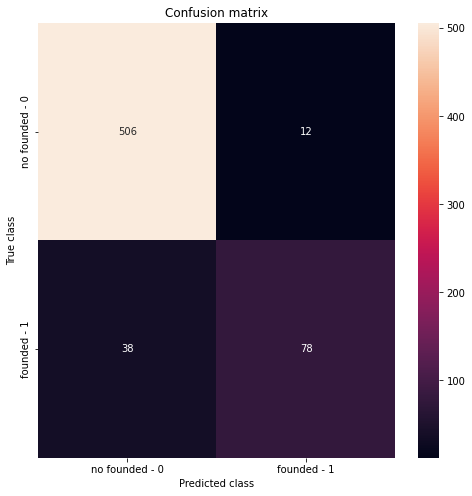

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       518
           1       0.87      0.67      0.76       116

    accuracy                           0.92       634
   macro avg       0.90      0.82      0.86       634
weighted avg       0.92      0.92      0.92       634



In [43]:
show_results(df_test_labels, preds)

Accuracy is how close a measurement result is to the true value.
True positives and true negatives.

*Grades:*

The __true positive__ occurs when the actual value is positive and the prediction result classified it as positive.

The __true negative__ occurs when the actual value is negative and the prediction result classified it as negative.

The __false negative__ occurs when the actual value is positive and the prediction result classified it as negative (type II error).

The __false positive__ occurs when the actual value is negative and the prediction result classified it as positive (type I error).

In [44]:
print(f'Train Accuracy: {modeloAC.score(df_train_set,df_train_labels)}')
print(f'Test Accuracy: {modeloAC.score(df_test_set,df_test_labels)}')
print(f'Validation Accuracy: {modeloAC.score(df_validation_set,df_validation_labels)}')

Train Accuracy: 0.9956590370955012
Test Accuracy: 0.9258675078864353
Validation Accuracy: 0.9258675078864353


#### 4.13: __ROC CURVE__:

To detect the true possitives

To draw a ROC curve, only the True Positive (VPR) and False Positive (FPR) ratios are necessary. The VPR measures the extent to which a classifier or diagnostic test is capable of detecting or classifying positive cases correctly, among all the positive cases available for the test. The FPR defines how many positive results are incorrect out of all the negative cases available during the test.

Discrete classifiers, such as decision trees or rule systems, output numerical values ​​with a binary label. When these classifiers are used with a particular set of instances to classify or predict, the classifier's performance provides a single point in the ROC space.

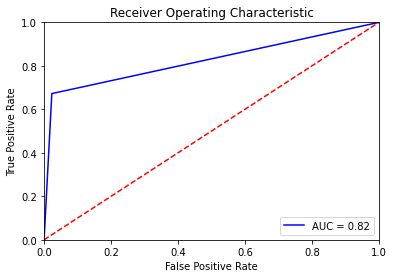

In [45]:
fpr, tpr, threshold = metrics.roc_curve(df_test_labels, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Promotion of the final models going to 'QA'

In [46]:
# The model is accepted by the DS, and goes to pre-production or QA
MLOMetadataModel.promote_stage_to_qa(workspace, model_name, version)

Replacing tag stage -> assesment with stage -> qa
Changing modeladmision-creditostage to 'qa'
